# Review of object definition and usage

## Types, methods, method calls

It's safe to think of everything in Python as an object, which means that it's type will be some kind of class. A class is the blueprint for one or more objects and defines the behavior (via a list of methods) for each object of a specific class.

In [1]:
import numpy as np

print(type(34))
print(type("hi"))
print(type(np.array([1,2])))

<class 'int'>
<class 'str'>
<class 'numpy.ndarray'>


Every object has a field that points to the "kind of thing it is".  We use the term *class* to mean the kind of thing is:

In [26]:
print((34).__class__)
print("hi".__class__)
print(np.array([1,2]).__class__)

<class 'int'>
<class 'str'>
<class 'numpy.ndarray'>


Using `dir` we can get the list of methods associated with a particular objects class definition.

In [2]:
methods = dir(34) # get methods for integer objects
methods[0:10]

['__abs__',
 '__add__',
 '__and__',
 '__bool__',
 '__ceil__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__']

For example, `lower` is a method of class `str`.

In [3]:
"HI".lower

<function str.lower()>

In [4]:
"HI".lower()

'hi'

In `"HI".lower()` we are sending the `lower` message to the `"HI"` string object. Messages are really just functions associated with classes/objects.

In a language that does not support object learning programming, we would do something like:

```python
lower(x)
```

Python has both functions and object-oriented programming which is why there is both `x.lower()` and:

In [5]:
len("HI")

2

The choice of function or "message" is up to the library designer, but `lower` only makes sense for strings so it makes sense to group it with the definition of `str`.

In terms of implementation, however, `x.lower()` is actually implemented as `str.lower(x)` where `str` is the class definition for strings. Computer processors understand function calls; they do not understand objects and so we performed this translation within the Python interpreter itself.

Don't confuse object and package/module member access. The dot `.` operator is overloaded in Python to mean both package/module member and object member access.  You are familiar with this already:

In [7]:
import numpy as np
np.array([1,2,3])

array([1, 2, 3])

In [7]:
import math
math.log(3000)

8.006367567650246

This is a common point of confusion when reading code. When we see `a.f()`, we don't know whether that function `f` is a member of the module identified by `a` or an object referred to by `a`.

**Fields versus methods**

Objects have functions, which we call *methods* to distinguish them from functions not associated with objects. Objects also have variables, which we call *fields* or *instance variables*.  

Fields are the *state* of the object.  Methods are the *behavior* of the object.

## Defining custom objects

Let's say we wanted to load a bunch of documents into memory and each document has a title and content. We could just create a list of tuples:

In [10]:
docs = [('Cats are Human', 'blah blah'),
        ('Dogs are fun', 'yadda yadda')]

The problem is that we don't get to name the individual elements of each document. For example, the title of the first document is `docs[0][0]`. Wouldn't it be better if we we could name the individual elements? Sure. Let's make each document be a dictionary:

In [11]:
docs = [{'title':'Cats are Human', 'content':'blah blah'},
        {'title':'Dogs are fun', 'content':'yadda yadda'}]

Now, the title of the first document is `docs[0]['title']`:

In [12]:
for d in docs:
    print(d['title'],':',d['content'])

Cats are Human : blah blah
Dogs are fun : yadda yadda


Python implemention of objects is very dictionary-like (from what I read and experience). But, instead of `d['title']`, we access variables (fields) of objects with `d.title`. To gain access to that notation, there is formal mechanism to create classes of objects:

In [9]:
class Doc:
    pass # pass means "do nothing"

d = Doc()
d.title = 'Cats are Human' # assign values to fields of that object
d.content = 'blah blah'

While we can name fields that way, it's better to use a *constructor method*:

In [13]:
class Doc:
    def __init__(self, title, content):
        self.title = title
        self.content = content

In [14]:
docs = [Doc('Cats are Human', 'blah blah'),
        Doc(title='Dogs are fun', content='yadda yadda')]
docs

[<__main__.Doc at 0x7fde515d82b0>, <__main__.Doc at 0x7fde515d8580>]

In [12]:
for d in docs:
    print(f"{d.title}:{d.content}")

Cats are Human:blah blah
Dogs are fun:yadda yadda


Using the constructor, `__init__()`, we get more readable code and it allows us to assign the incoming parameters to fields of the object.  Unfortunately, Python doesn't know how to print out our custom objects so we have to add another funny looking method:

In [15]:
class Doc:
    def __init__(self, title, content):
        self.title = title
        self.content = content
    def __str__(self): # called when conversion to string needed like print
        return f"Doc({self.title}, {self.content})"

docs = [Doc('Cats are Human', 'blah blah'),
        Doc(title='Dogs are fun', content='yadda yadda')]

print(docs[0])
print(str(docs[0]))

Doc(Cats are Human, blah blah)
Doc(Cats are Human, blah blah)


**The key to understanding methods versus functions**

In [15]:
class Doc:
    def __init__(self, title, content):
        self.title = title
        self.content = content
        
    def save(self, filename):
        print(f"saving doc into {filename}") # pretend to save
        
    def __str__(self): # called when conversion to string needed like print
        return f"Doc({self.title}, {self.content})"


For some `Doc` called `d`, `d.save("t.txt")` **method call** is translated and executed by the Python interpreter as **function call** `Doc.save(d,"t.txt")`. `d` becomes parameter `self` and so the `save()` function is operating on doc `d`.

Why we prefer `d.save("t.txt")` over `Doc.save(d,"t.txt")`: Instead of just functions, we send messages back and forth between objects. Instead of bark(dog) we say dog.bark() or instead of inflate(ball) we say ball.inflate().

Warning: Make sure that you use `self.x` to refer to field `x` from methods within a class, otherwise you are creating a local variable inside a method:

In [25]:
class Foo:
    def __init__(self, x):
        self.x = x
    def foo(self):
        x = 3 # WARNING: does not alter the field! should be self.x

In [26]:
f = Foo(99)
f.x

99

In [27]:
f.foo()
f.x

99

## Exercise

Define a class called `Point` that has a constructor taking x, y coordinates and make them fields of the class.

Define method `distance(q)` that takes a `Point` and returns the Euclidean distance  from `self` to `q`.

Test with

```
p = Point(3,4)
q = Point(5,6)
print(p.distance(q))
```

Add method `__str__` so that `print(q)` prints something nice like `(3,4)`.

## Binary trees whose nodes are objects

The tree data structure is one of the most important in computer science and is extremely common in data science as well. Decision trees, which form the core of gradient boosting machines and random forests (machine learning algorithms), are naturally represented as trees in memory. When we process HTML and XML files, those are generally represented by trees. For example:

<img align="right" src="figures/xml-tree.png" width="200"></td>
```xml
<bookstore>
  <book category="cooking">
    <title lang="en">Everyday Italian</title>
    <author>Giada De Laurentiis</author>
    <year>2005</year>
    <price>30.00</price>
  </book>
  <book category="web">
    <title lang="en">Learning XML</title>
    <author>Erik T. Ray</author>
    <year>2003</year>
    <price>39.95</price>
  </book>
</bookstore>
```

We're going to look at a simple kind of tree that has at most two children: a *binary tree*. A node that has no children is called a *leaf* and non-leaves are called *internal nodes*.

In general, trees with $n$ nodes have $n-1$ edges. Each node has a single incoming edge and the root has none.

Nodes have *parents* and *children* and *siblings* (at the same level).

Sometimes nodes have links back to their parents for programming convenience reasons. That would make it a graph not a tree but we still consider it a tree.

In [16]:
class Tree:
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right      

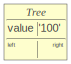

In [17]:
from lolviz import *

root = Tree(100)
treeviz(root)

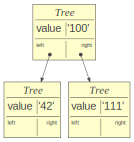

In [18]:
root.left = Tree(42)
root.right = Tree(111)
treeviz(root)

Here's an alternate spec:

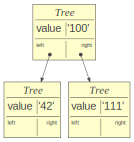

In [19]:
root = Tree(100, Tree(42), Tree(111))
treeviz(root)

We will look at these in more detail in MSDS621 as you'll be building decision trees via similar objects

## Operator overloading

Python allows class definitions to implement functions that are called when standard operator symbols such as `+` and `/` are applied to objects of that type. This is extremely useful for mathematical libraries such as numpy, but is often abused. Note that you could redefine subtraction to be multiplication when someone used the `-` sign. (Yikes!)

Here's an extension to `Point` that supports `+` for `Point` addition:

In [20]:
import numpy as np

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
            
    def __add__(self,other):
        x = self.x + other.x
        y = self.y + other.y
        return Point(x,y)
    
    def __str__(self):
        return f"({self.x},{self.y})"

In [21]:
p = Point(3,4)
q = Point(5,6)
print(p, q)
print(p + q) # calls p.__add__(q) or Point.__add__(p,q)
print(Point.__add__(p,q))

(3,4) (5,6)
(8,10)
(8,10)
